In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from joblib import dump, load
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
PATH = r"tweets\train2.csv"

df = pd.read_csv(PATH)
df.head()


,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


In [4]:
df['selected_text'] = df['selected_text'].astype(str)


In [5]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if isinstance(X, pd.Series):
            return X.apply(self.preprocess_text)
        else:  # handle other iterables
            return [self.preprocess_text(text) for text in X]
    
    def preprocess_text(self, text):
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum()]
        tokens = [token for token in tokens if token not in self.stop_words]
        return " ".join(tokens)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),  # Preprocess text data
    ('vectorizer', TfidfVectorizer()),     # Convert text to TF-IDF features
    ('classifier', MultinomialNB())        # Train on TF-IDF vectors with Naive Bayes classifier
])



In [6]:
pipeline 


Pipeline(steps=[('preprocessor', TextPreprocessor()),
                ('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [7]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['selected_text'], df['sentiment'], test_size=0.2, random_state=42)



In [8]:
# Train the pipeline
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
# Evaluate the model
print("Model accuracy:", pipeline.score(X_test, y_test))



Model accuracy: 0.7833363652901583


In [9]:
# Load the pipeline and predict new sentences
loaded_pipeline = load('sentiment_analysis_pipeline.joblib')

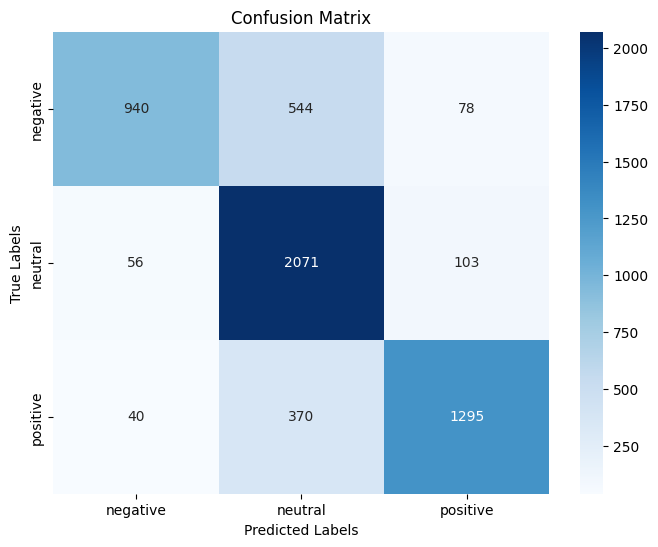

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import seaborn as sns

conf_matrix = confusion_matrix(y_test, prediction)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:

# Save the pipeline
dump(pipeline, 'sentiment_analysis_pipeline.joblib')




['sentiment_analysis_pipeline.joblib']

In [13]:
# Load the pipeline and predict new sentences
loaded_pipeline = load('sentiment_analysis_pipeline.joblib')

In [16]:
# Get a sentence from user input
user_sentences = [
    "Today is a wonderful day",
    "I had my lunch",
    "I am very sad todays",
]


for i in range(len(user_sentences)):
    # Use the pipeline to make a prediction
    prediction = loaded_pipeline.predict([user_sentences[i]])
    print(f"{user_sentences[i]}: {prediction[0]}")

Today is a wonderful day: positive
I had my lunch: neutral
I am very sad todays: negative
her pussy is pink: neutral
her pussy is black: neutral
